# Political Affiliation of a County on CALFresh Applications

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Our project looks at data for political preference and CalFresh applications in each California county to see if a political party predicts CalFresh applications in 2018. We webscraped our CalFresh data and combined it with our county political party dataset. We analyzed this joined dataset using a t-test and linear regression models to determine if there was a relationship. From our results, we found that there was no relationship between political preference and percentage of CalFresh households in a county.


# Names

- Maxwell Wong
- Alyssa Li
- Anh Nguyen
- Efrain Contreras

<a id='research_question'></a>
# Research Question

Does political affiliation of a county in California affect the percentage of CALfresh households of that specific county?

<a id='background'></a>

## Background & Prior Work

Calfresh is a benefit program for low-income families who meet certain federal income eligibility requirements. It was established in 1977 and is well-known as Food Stamps and administered by the California Department of Social Service (CDSS). This program helps people have healthy and nutritious meals within their budget. Each CalFresh certification has a period of 12-month and people need to re-apply after the period. Below are some eligibilities to apply for CalFresh:
People who want to apply for Calfresh needs to have lived in the country for five years under a qualified status
Families that only have elderly and/or disabled members and no earned incomes are certified for 36 months
Children under 18 years old who are legally admitted for permanent residence under the Immigration and Naturalization Act

The amount an individual receives from CalFresh will depend on different aspects such as income, expenses, and family size. In general, according to the DPSS, households at 130% Federal Poverty Level (FPL) are eligible for applying to CalFresh (gross income before tax). 
References (include links): 

1. https://www.benefits.gov/benefit/1228
2. http://calfresh.guide/how-to-keep-getting-calfresh-benefits-certification-periods/
3. https://www.cdss.ca.gov/inforesources/calfresh-outreach/about-us
4. https://www.cdss.ca.gov/inforesources/cdss-programs/calfresh/eligibility-and-issuance-requirements
5. https://www.cdss.ca.gov/foodstamps/res/pdf/CalFreshBrochureEng.pdf
6. https://www.politico.com/2020-election/results/california/
7. https://www.cdss.ca.gov/inforesources/research-and-data/calfresh-data-tables
8. https://dpss.lacounty.gov/en/food/calfresh/gross-income.html

# Hypothesis


We predict that Democratic dominant counties are more likely to apply for CalFresh than Republican counties. Historically, the Republican party is regarded as the conservative party, which could potentially affect their likelihood to support and apply for benefits. On the other hand, Democrats tend to support progressive policies and may be more inclined to support and use general welfare.

Source:
https://en.wikipedia.org/wiki/Political_positions_of_the_Democratic_Party#:~:text=The%20party%20favors%20a%20mixed,economic%20development%20and%20job%20creation.

# Dataset(s)

Dataset 1:  Percentage of households receive food stamp in California by counties in 2018
- Link: https://statisticalatlas.com/state/California/Food-Stamps#figure/county/most-food-stamps
- Observations: 50
- Notes: This dataset contains information on the 50 most populous counties of the 58 total counties in California. This website contains different datasets, broken down by different categories, about the percentage of households receiving food stamps. For this project, we will mainly focus on the percentage of recipients by counties because later on we will also look at the percentage of parties, Democrat and Republic, by counties.




Dataset 2: Registration by County in California as of October 19, 2018
- Link:  https://elections.cdn.sos.ca.gov/ror/15day-gen-2018/county.pdf
- Observations: 58 counties
- Notes: This dataset contains information on the party preference of eligible voters in all 58 counties in California and percentage of each county. This dataset contains the percentage of registration by county. In each county, we can see the percentage of registration by parties based on the total number of eligible. This is helpful as we can utilize the two datasets to calculate the percentage of food stamp recipients with the percentage of registration by parties for each county. 



The two datasets will be merged via county names since the county names will be unique.

# Setup

For our project, we will analyze two different datasets.  The first dataset includes the number and percentage of CalFresh receiving households. The second dataset has information on the total number of registered voters in the counties and their registered political affiliation.

The first dataset will be created via web scraping off of the CalFresh statistics webpage. We will use the package Beautiful Soup in order to scan the html of our dataset. This should allow us to gather the name of each county, the percentage and total count of CalFresh Applicants on that specific county. We are using Beautiful Soup since the native HTML reader for Pandas is designed to specifically read HTML tables and the data we are trying to scrape was not placed inside an HTML table.	

The second dataset is in a pdf file so we will read in the information with a package called Tabula-py since Pandas can not read in PDF files.

In [1]:
#CalFresh application dataset
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd



my_url = "https://statisticalatlas.com/state/California/Food-Stamps"

uClient = uReq(my_url) # Open connection to the website
page_html = uClient.read() # Grab the html
uClient.close() # Close Connection to the website
page_soup = soup(page_html, "html.parser") # Parse the html text



county_data = page_soup.find("div", {"id": "figure/county" }) # Get the table in counties


county_data = county_data.g.findAll("text")[7:] # Removes header from list

county_data.pop(14) # Removes US from list
county_data.pop(22) # Removes West list
county_data.pop(22) # Removes Pacific list
county_data.pop(29) # Removes California from list

county_name_lst = county_data[:50] # Final array contains the name of 50 counties in CA

county_data = county_data[50:] # Remove the name of the counties from the scrapped table 


# Creates a list contaning percentage of CalFreshCounties per county
county_percent_lst = county_data[::3]

county_percent_lst.pop(14) # Removes US from list
county_percent_lst.pop(22) # Removes West list
county_percent_lst.pop(22) # Removes Pacific list
county_percent_lst.pop(29) # Removes California from list


# Creates a list contaning count of CalFreshCounties per county
county_count_lst = county_data[1::3] 

county_count_lst.pop(14) # Removes US from list
county_count_lst.pop(22) # Removes West list
county_count_lst.pop(22) # Removes Pacific list
county_count_lst.pop(29) # Removes California from list


# This for loop, goes through each HTML container in the arrays and grabs the text inside
for index in range(len(county_name_lst)):
    county_name_lst[index] = county_name_lst[index].text
    county_percent_lst[index] = county_percent_lst[index].text
    county_count_lst[index] = county_count_lst[index].text
    

# Create the dataframe
calFreshDf = pd.DataFrame({"County": county_name_lst,
                   "Percentage of CalFresh Households": county_percent_lst,
                   "Total CalFresh HouseHolds": county_count_lst})

calFreshDf.head()

,County,Percentage of CalFresh Households,Total CalFresh HouseHolds
0,Tulare,23.4%,31.4k
1,Merced,21.0%,16.5k
2,Imperial,20.9%,"9,568"
3,Fresno,20.7%,62.1k
4,Madera,17.5%,"7,637"


In [2]:
#California county party dataset
from tabula import read_pdf
import pandas as pd

# makes you print all rows
pd.set_option('display.max_rows', None)

# reads in all pages into one big list, each list is its own dataframe
readDf = read_pdf("county.pdf", pages = "all")

In [3]:
#Import necessary packages
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

1. Drop eligibility column in voter registration dataset. 
2. Combine Non-major party voter registration (American Independent, Green, Libertarian, Peace and Freedom, Unknown, Other) into one column (Third Party) by summing them up.
3. Take out rows in the voter registration dataset and CalFresh dataset that deals with count instead of percentage.
4. Merge county and calfresh datasets.

In [4]:
# used to keep track of dataframes that we joined together
dfList = []

# each county data is kept in seperate pages so we need to prepare the data for joining
for i in range(0, len(readDf), 2):
    # combine the dataframe with next page since they are split into two pages (basically 2 pages are used to keep one dataframe worth of info)
    tmp = pd.concat([readDf[i], readDf[i + 1]], axis = 1)

    # we join side by side, so theres another column that has county, but this column is a duplicate of initial county column so we need to drop the duplicate
    tmp = tmp.loc[:, ~tmp.columns.duplicated()]

    # drop the rows that have a percent (keep county)
    countyDf = tmp.iloc[::2].dropna(axis=1).reset_index(drop=True)
    countyDf.index = range(0, len(countyDf))

    # get rid of columns that have total count (keep county column only since other columns have total count)
    countyDf = countyDf["County"]

    # drop the rows that have a county (keep row)
    rowDf = tmp.iloc[1::2].reset_index(drop=True)
    rowDf.index = range(0, len(countyDf))

    # remove columns that don't deal with voter registration by party
    rowDf = rowDf.drop(rowDf.columns[:3], axis = 1)

    # place rowDf to right of countyDf
    combineDf = pd.concat([countyDf, rowDf], axis=1) 

    # add combined df to list
    dfList.append(combineDf)

# combine all the dataframes into one big dataframe, so all 50 counties worth of data is kept in one dataframe
completeDf = pd.DataFrame()
for df in dfList:
    completeDf = completeDf.append(df, ignore_index=True)

# drop last row since last row is total data of state not county
completeDf = completeDf[:-1]


# sum up third party voters into one
thirdParty = ["Independent", "Green", "Libertarian", "Freedom", "Unknown", "Other"]

# convert string percententage values to float
def convertToFloat(x):
    if type(x) is str:
        return float(x.strip("%"))
    return x

# convert float representation to percentage
def convertToPercent(x):
    return format(x, '.2f') + "%"

# convert string values in pdf into int so we can sum
for pty in thirdParty:
    completeDf[pty] = completeDf[pty].map(convertToFloat)

# add the values of third party voters into one column
completeDf["Third Party"] = completeDf[thirdParty[0]] + completeDf[thirdParty[1]] + completeDf[thirdParty[2]] + completeDf[thirdParty[3]] + completeDf[thirdParty[4]] + completeDf[thirdParty[5]]

# convert the int value back into string percent
completeDf["Third Party"] = completeDf["Third Party"].map(convertToPercent)

# drop third party columns
completeDf = completeDf.drop(columns=thirdParty)

# update name on column since it got cut off when we read with tab
completeDf = completeDf.rename(columns = {"Preference": "No Preference"})

completeDf.head()

,County,Democratic,Republican,No Preference,Third Party
0,Alameda,55.67%,11.05%,29.16%,4.11%
1,Alpine,41.16%,27.04%,26.39%,5.41%
2,Amador,28.80%,43.99%,20.68%,6.53%
3,Butte,34.91%,34.18%,24.02%,6.90%
4,Calaveras,27.37%,41.45%,23.09%,8.10%


In [5]:
#Join county and calfresh datasets
finalDF = pd.merge(completeDf, calFreshDf, on='County', how='right')

finalDF.head()

,County,Democratic,Republican,No Preference,Third Party,Percentage of CalFresh Households,Total CalFresh HouseHolds
0,Tulare,31.10%,39.19%,24.73%,4.99%,23.4%,31.4k
1,Merced,43.26%,27.39%,24.85%,4.50%,21.0%,16.5k
2,Imperial,47.53%,18.39%,29.43%,4.65%,20.9%,"9,568"
3,Fresno,37.85%,33.23%,23.84%,5.06%,20.7%,62.1k
4,Madera,31.57%,38.51%,24.67%,5.24%,17.5%,"7,637"


In [6]:
# Duplicates df for standarization
finalDFStandardized = finalDF

In [7]:
# Standardize columns with '%'
# Function replaces '%' and converts it to float
def standardize_percentage(string):
    
    string = string.lower()
    string = string.strip()
    
    string = string.replace('%','')
    
    string = string.strip()
    
    string = float(string)
    
    return string

In [8]:
#Transform 'Democratic' Column
finalDFStandardized['Democratic'] = finalDFStandardized['Democratic'].apply(standardize_percentage)

#Transform 'Republican' Column
finalDFStandardized['Republican'] = finalDFStandardized['Republican'].apply(standardize_percentage)

#Transform 'No Preference' Column
finalDFStandardized['No Preference'] = finalDFStandardized['No Preference'].apply(standardize_percentage)

#Transform 'Third Party' Column
finalDFStandardized['Third Party'] = finalDFStandardized['Third Party'].apply(standardize_percentage)

#Transform 'Percentage of CalFresh Households' Column
finalDFStandardized['Percentage of CalFresh Households'] = finalDFStandardized['Percentage of CalFresh Households'].apply(standardize_percentage)

In [9]:
# Standardize columns that contain 'k' and ','
# Function replaces 'k' and ',' and converts data to float
def standardize_k(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'k' in string:
        string = string.replace('k','')
        string = string.strip()
    
        string = float(string)
        string = string*1000
        string = int(string)
        
    elif ',' in string:
        string = string.replace(',','')
        string = int(string) 
        
    else:
        string = int(string)
        
    return string

In [10]:
# Transform 'Total CalFresh HouseHolds' Column
finalDFStandardized['Total CalFresh HouseHolds'] = finalDFStandardized['Total CalFresh HouseHolds'].apply(standardize_k)

finalDFStandardized.head()

,County,Democratic,Republican,No Preference,Third Party,Percentage of CalFresh Households,Total CalFresh HouseHolds
0,Tulare,31.10,39.19,24.73,4.99,23.4,31400
1,Merced,43.26,27.39,24.85,4.50,21.0,16500
2,Imperial,47.53,18.39,29.43,4.65,20.9,9568
3,Fresno,37.85,33.23,23.84,5.06,20.7,62100
4,Madera,31.57,38.51,24.67,5.24,17.5,7637


In [11]:
# Use this df for final from this point on
df = finalDFStandardized

df = df.rename(columns={"Percentage of CalFresh Households": "PercentCFHH"})
df = df.rename(columns={"Total CalFresh HouseHolds": "TotalCFHH"})

df

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH
0,Tulare,31.10,39.19,24.73,4.99,23.4,31400
1,Merced,43.26,27.39,24.85,4.50,21.0,16500
2,Imperial,47.53,18.39,29.43,4.65,20.9,9568
3,Fresno,37.85,33.23,23.84,5.06,20.7,62100
4,Madera,31.57,38.51,24.67,5.24,17.5,7637
5,Kings,32.36,40.78,22.17,4.67,17.0,7125
6,Kern,33.54,35.28,25.85,5.34,17.0,44600
7,Yuba,26.82,36.18,29.13,7.86,16.4,4207
8,San Bernardino,38.98,29.43,25.88,5.71,15.9,98600
9,Stanislaus,37.29,34.86,22.25,5.61,15.8,26900


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

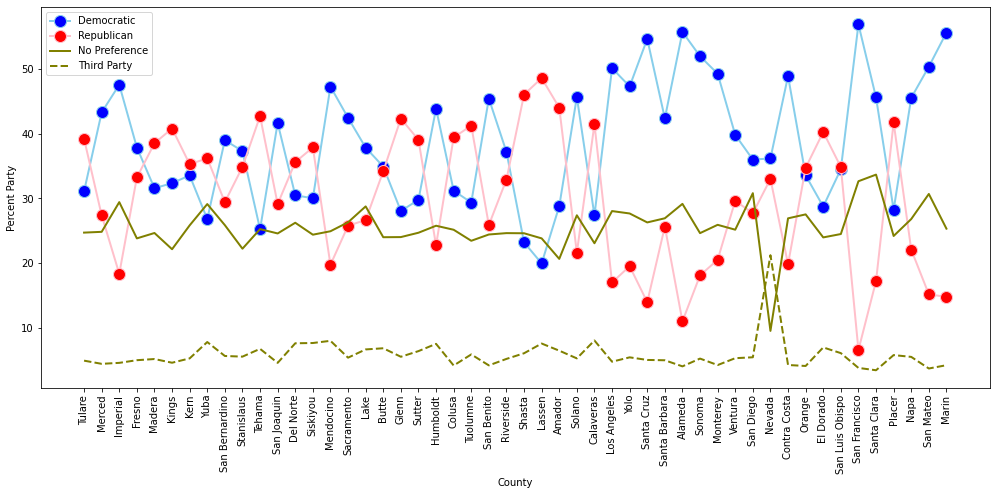

In [12]:
# Plot party preference of each California county
temp = pd.DataFrame({'x': df['County'], 'y1': df['Democratic'], 'y2': df['Republican'], 'y3': df['No Preference'], 'y4': df['Third Party']})
plt.rcParams['figure.figsize'] = (17, 7)

plt.plot( 'x', 'y1', data=temp, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="Democratic")
plt.plot( 'x', 'y2', data=temp, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=2, label="Republican")
plt.plot( 'x', 'y3', data=temp, marker='', color='olive', linewidth=2, label="No Preference")
plt.plot( 'x', 'y4', data=temp, marker='', color='olive', linewidth=2, linestyle='dashed', label="Third Party")

plt.xlabel("County")
plt.ylabel('Percent Party')
plt.xticks(rotation = 90)
plt.legend()

The line plot graphs the percentage of the party preference in each county. We can see that the Democratic party or the Republican party are usually the dominant party.

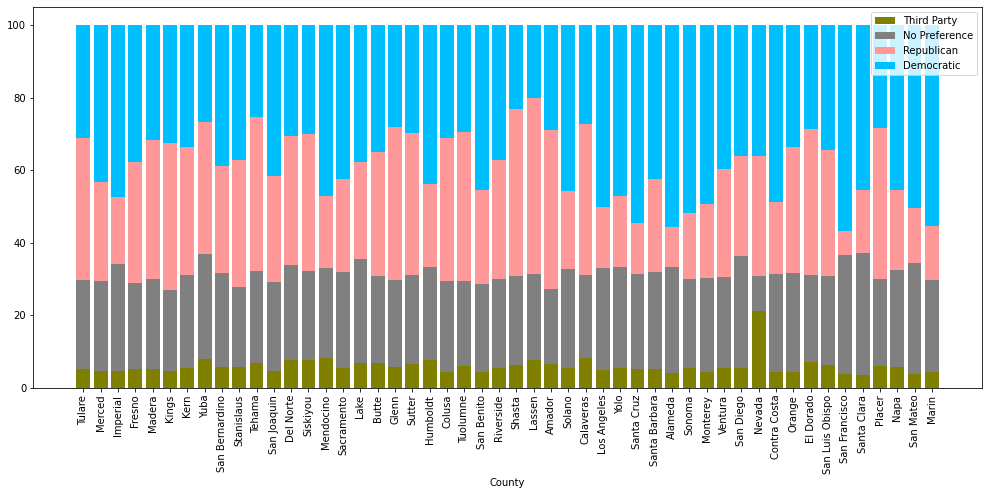

In [13]:
#Barplot of party perference per county
fig, ax = plt.subplots()
ax.bar(df['County'], df['Third Party'], label='Third Party', color='olive')
ax.bar(df['County'], df['No Preference'], label='No Preference', bottom=np.array(df['Third Party']), color = 'grey')
ax.bar(df['County'], df['Republican'], label='Republican', bottom=np.array(df['Third Party'])+np.array(df['No Preference']), color='#FF9999')
ax.bar(df['County'], df['Democratic'], label='Democratic', bottom=np.array(df['Third Party'])+np.array(df['No Preference'])+np.array(df['Republican']), color = '#00BFFF')

plt.xlabel("County")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

From the barplot, we see that the stacked parties of each county adds up to 100, which would account for all voters in that county. This also better represents the party preference within the county.

In [14]:
#Determine dominant political party per county and return in new column 'DominantParty'
dominant_party = finalDFStandardized['Democratic'] > finalDFStandardized['Republican']

df["DominantParty"] = dominant_party

df = df.replace([False, True], ['R', 'D'])
df.head()

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
0,Tulare,31.10,39.19,24.73,4.99,23.4,31400,R
1,Merced,43.26,27.39,24.85,4.50,21.0,16500,D
2,Imperial,47.53,18.39,29.43,4.65,20.9,9568,D
3,Fresno,37.85,33.23,23.84,5.06,20.7,62100,D
4,Madera,31.57,38.51,24.67,5.24,17.5,7637,R


<AxesSubplot:xlabel='DominantParty', ylabel='count'>

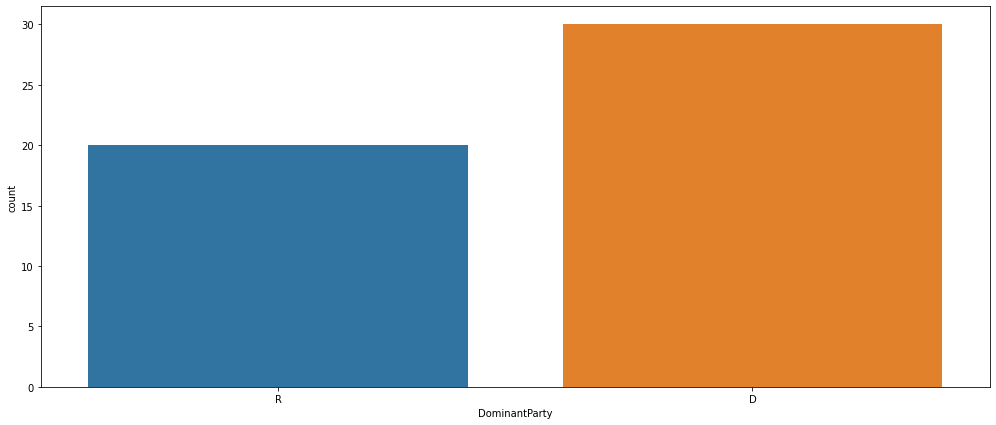

In [15]:
sns.countplot(df['DominantParty'])

There are more Democratic counties in California than Republican counties.

In [18]:
# County with the highest percentage of CF applications
df[df["PercentCFHH"] == df["PercentCFHH"].max()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
0,Tulare,31.1,39.19,24.73,4.99,23.4,31400,R


In [19]:
# County with the lowest percentage of CF applications
df[df["PercentCFHH"] == df["PercentCFHH"].min()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
49,Marin,55.56,14.82,25.34,4.29,3.3,3493,D


The county with the highest percentage of CalFresh applications is Tulare, with 23.4% of households receiving CalFresh and the county with the least percentage of applications is Marin, with 3333.3% of households receiving CalFresh.

In [20]:
# County with the highest percentage of Democratics
df[df["Democratic"] == df["Democratic"].max()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
44,San Francisco,56.84,6.63,32.65,3.87,5.2,18400,D


In [21]:
# County with the lowest percentage of Democratics
df[df["Democratic"] == df["Democratic"].min()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
26,Lassen,19.98,48.55,23.84,7.63,9.9,942,R


In [22]:
# County with the highest percentage of Republicans
df[df["Republican"] == df["Republican"].max()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
26,Lassen,19.98,48.55,23.84,7.63,9.9,942,R


In [23]:
# County with the lowest percentage of Republicans
df[df["Republican"] == df["Republican"].min()]

,County,Democratic,Republican,No Preference,Third Party,PercentCFHH,TotalCFHH,DominantParty
44,San Francisco,56.84,6.63,32.65,3.87,5.2,18400,D


There is an inverse relationship between the percent of Democratics and Republicans in a county. The county with the highest percent of Democratics (San Francisco) has the least percent of Republicans. The county with the highest percent of Republicans (Lassen) has the least percent of Democratics.

### Graphs and Distributions

<AxesSubplot:>

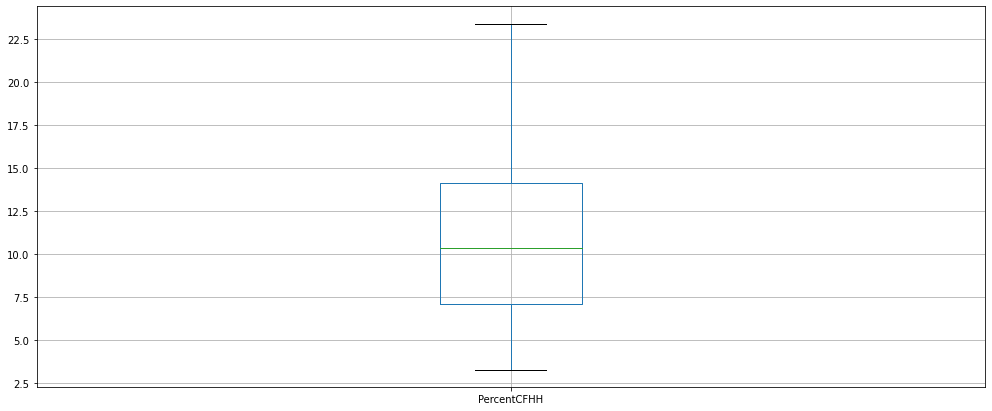

In [24]:
df.boxplot(column=["PercentCFHH"])

This boxplot shows the range for the percentage of calfresh applicants per county.

<AxesSubplot:title={'center':'PercentCFHH'}, xlabel='DominantParty'>

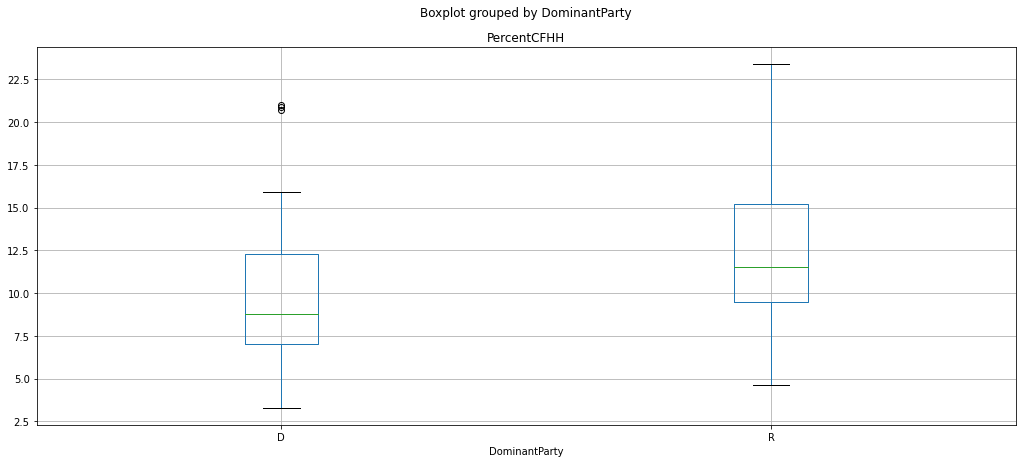

In [25]:
df.boxplot(column=["PercentCFHH"], by="DominantParty")

The boxplots above show the range for calfresh applicants grouped by their dominant party. IT can be seen that democrat counites have two outliers.

array([[<AxesSubplot:title={'center':'Democratic'}>,
        <AxesSubplot:title={'center':'Republican'}>],
       [<AxesSubplot:title={'center':'No Preference'}>,
        <AxesSubplot:title={'center':'Third Party'}>],
       [<AxesSubplot:title={'center':'PercentCFHH'}>,
        <AxesSubplot:title={'center':'TotalCFHH'}>]], dtype=object)

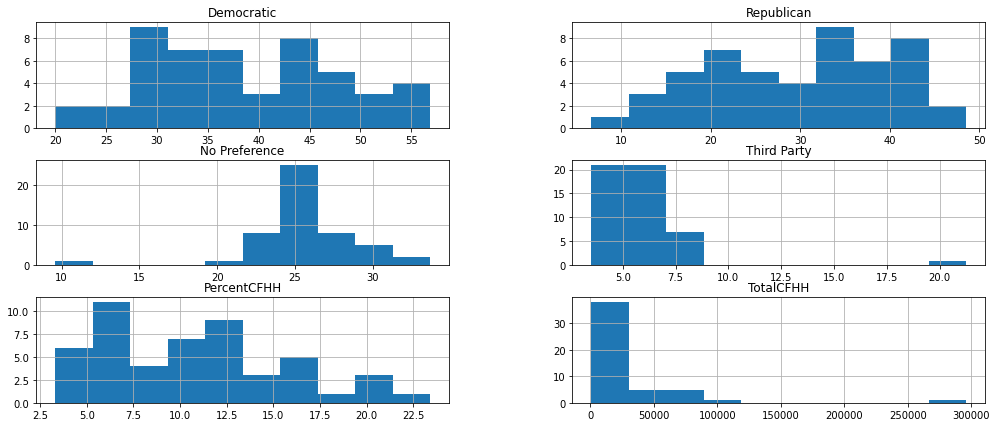

In [26]:
df.hist(bins=10)

The histograms above show a the rough distribution of our data. Each column in our data is represented on its own histogram with 10 bins.

(array([3., 4., 8., 2., 4., 3., 1., 2., 0., 3.]),
 array([ 3.3 ,  5.07,  6.84,  8.61, 10.38, 12.15, 13.92, 15.69, 17.46,
        19.23, 21.  ]),
 <BarContainer object of 10 artists>)

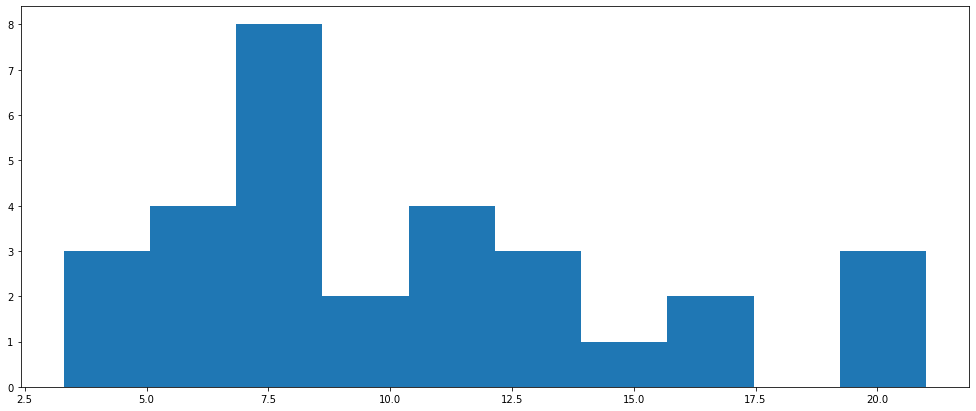

In [27]:
plt.hist(df.loc[df["DominantParty"] == "D"]["PercentCFHH"], bins=10,)

The histogram shows the percentage of CalFresh applicants on the x-axis and the y-shows the number of counties that fit within the range of that bin. Only for Democratic counties.

(array([4., 0., 4., 4., 1., 2., 4., 0., 0., 1.]),
 array([ 4.6 ,  6.48,  8.36, 10.24, 12.12, 14.  , 15.88, 17.76, 19.64,
        21.52, 23.4 ]),
 <BarContainer object of 10 artists>)

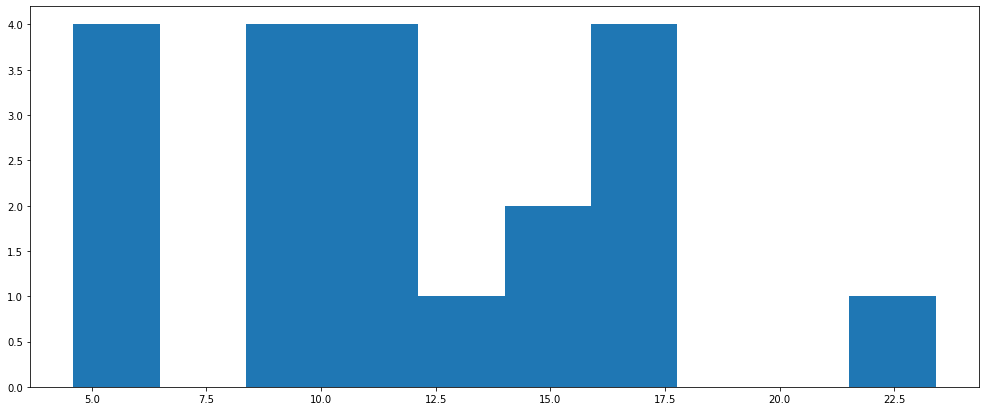

In [28]:
plt.hist(df.loc[df["DominantParty"] == "R"]["PercentCFHH"], bins=10,)

The histogram shows the percentage of CalFresh applicants on the x-axis and the y-shows the number of counties that fit within the range of that bin. Only for Republican counties

### T-Test

In [29]:
ttest_ind(df.loc[df["DominantParty"] == "D"]["PercentCFHH"], df.loc[df["DominantParty"] == "R"]["PercentCFHH"])

Ttest_indResult(statistic=-1.3872386627219944, pvalue=0.17177685628117328)

From our t-test, we get a t-statistic of -1.38 and a p-value of 0.177. Since we have a p-value of 0.177 which is higher than 0.1, we accept the null hypothesis and conclude that there isn’t a relationship between the percentage of Calfresh Households in Republican counties or Democratic counties.

### Linear Regression - Democrats

<AxesSubplot:xlabel='Democratic', ylabel='PercentCFHH'>

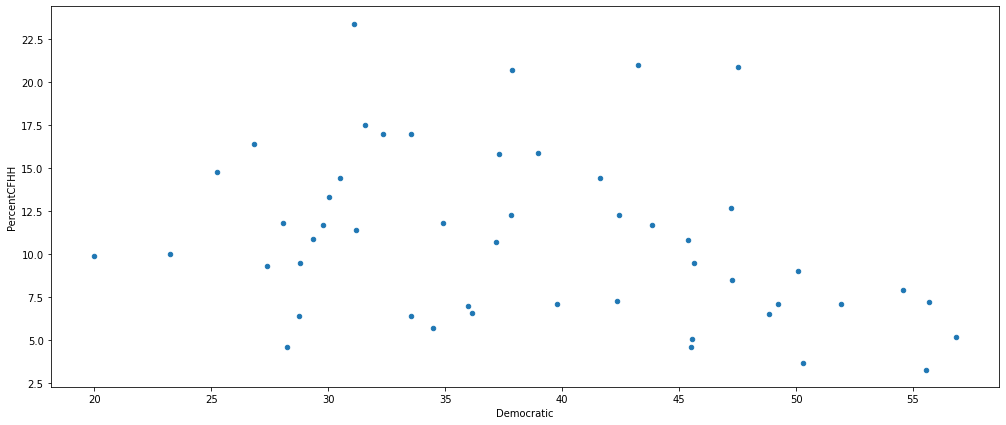

In [30]:
#Look at relation between Democratic and percentage CF
df.plot.scatter(x="Democratic", y="PercentCFHH")

It does not appear to have any outliers and it does not appear to be any clear correlation between the variables.

We want to see whether affiliation of a county in California, Democratic (predictor) affects the percentage of CalFresh household percentage (outcome):

In [31]:
outcome_1, predictors_1 = patsy.dmatrices("PercentCFHH ~ Democratic", data=df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [32]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            PercentCFHH   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     5.358
Date:                Fri, 12 Mar 2021   Prob (F-statistic):             0.0250
Time:                        13:16:30   Log-Likelihood:                -147.33
No. Observations:                  50   AIC:                             298.7
Df Residuals:                      48   BIC:                             302.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2518      2.823      6.112      0.0

There is a weak negative correlation between the percent of Democratics and CalFresh applications. P value is pretty high suggesting that a relationship between the two variables could be due to chance. Our R-squared is 0.100, indicating that our independent variable (Democratic) explains only 10% of the data variation of our variable (PercentCalFreshHousehold applications).
The effect size of the relationship between CalFresh household percentage and Democratic party is -0.1644 and the standard error is plus or minus 0.071
<center>PercentCFHH = 17.2518 + (-0.1644) * Percentage of Democratic in the county</center>

Interpretation: Whatever the percentage of Democratic party in a county is, we would expect that times (-0.1644) plus 17.2518 to be the estimate percentage of CalFresh household
For every 1 unit increaase in Democratic, we expect to see a negative slope, -0.1644 unit decrease in the PercentCFHH

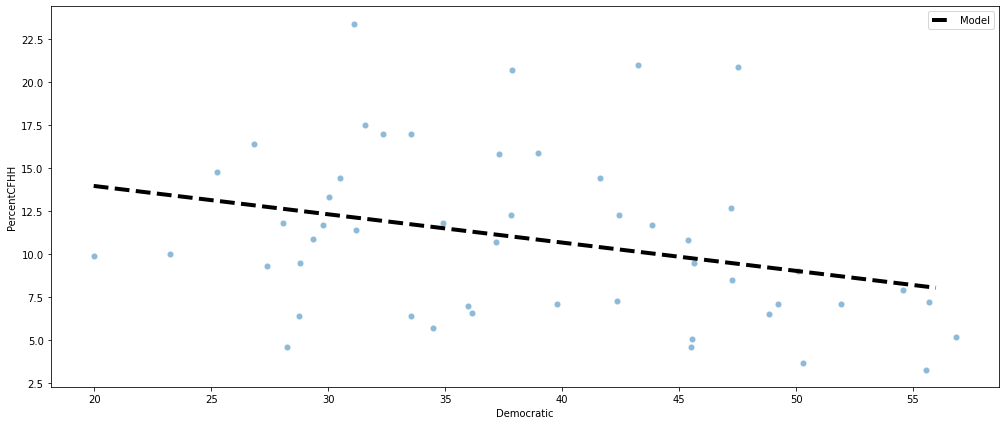

In [33]:
sns.scatterplot(x='Democratic', y='PercentCFHH', alpha=0.5, data=df, s=40)

xs = np.arange(df['Democratic'].min(), df['Democratic'].max())
ys = -0.1644 * xs + 17.2518
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Democratic')
plt.ylabel('PercentCFHH')
plt.legend();

Since we have a negative effect size between the two variables, after generating and plotting the model fit line, it shows the trend of Democratic, which is going down according to the percentage of CalFresh households (y-axis).  

### Linear Regression - Republicans

<AxesSubplot:xlabel='Republican', ylabel='PercentCFHH'>

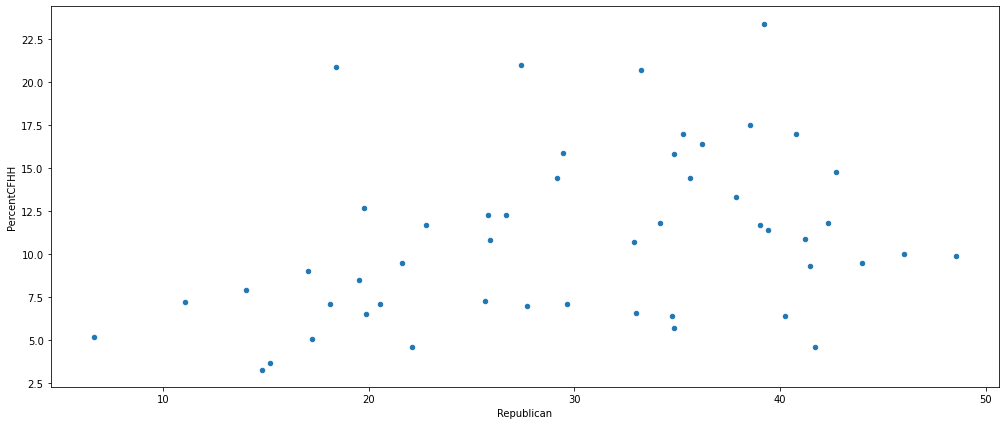

In [34]:
### PercentCFHH ~ Republican
df.plot.scatter(x="Republican", y="PercentCFHH")

It does not appear to have any outliers and it does not appear to be any clear correlation between the variables.
We want to see whether affiliation of a county in California, Reppublican (predictor) affects the percentage of CalFresh household percentage (outcome):

In [35]:
outcome_2, predictors_2 = patsy.dmatrices("PercentCFHH ~ Republican", data=df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            PercentCFHH   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.390
Date:                Fri, 12 Mar 2021   Prob (F-statistic):             0.0148
Time:                        13:16:30   Log-Likelihood:                -146.85
No. Observations:                  50   AIC:                             297.7
Df Residuals:                      48   BIC:                             301.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0280      2.038      2.958      0.0

There is a weak positive correlation between the percentage of Republicans and Calfresh  applications. P value is pretty high suggesting that a relationship between the two variables could be due to chance. Our R-squared is 0.117, indicating that our independent variable (Republican) explains only 11.7% of the data variation of our variable (PercentCalFreshHousehold applications).
The effect size of the relationship between CalFresh household percentage and Republican party is 0.1631 and the standard error is plus or minus 0.065
<center>PercentCFHH = 6.0280 + 0.1631 * Percentage of Republican in the county</center>
Interpretation: Whatever the percentage of Republican party in a county is, we would expect that times 0.1631 plus 6.0280 to be the estimate percentage of CalFresh household
For every 1 unit increaase in Republican, we expect to see a positive slope, 0.1631 unit increase in the PercentCFHH

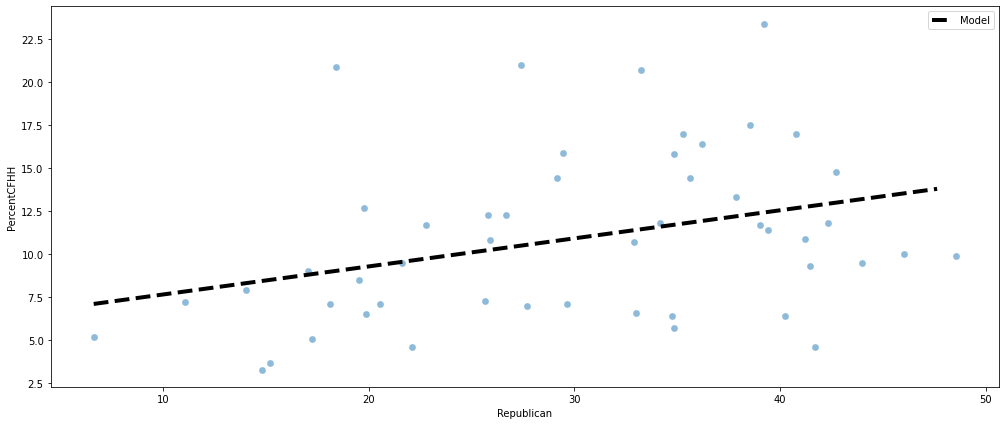

In [36]:
sns.scatterplot(x='Republican', y='PercentCFHH', alpha=0.5, data=df, s=50)

xs = np.arange(df['Republican'].min(), df['Republican'].max())
ys = 0.1631 * xs + 6.0280
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Republican')
plt.ylabel('PercentCFHH')
plt.legend();

Since we have a negative effect size between the two variables, after generating and plotting the model fit line, it shows the trend of Republican, which is going up according to the percentage of CalFresh households (y-axis).  

### Linear Regression - Dominant Party

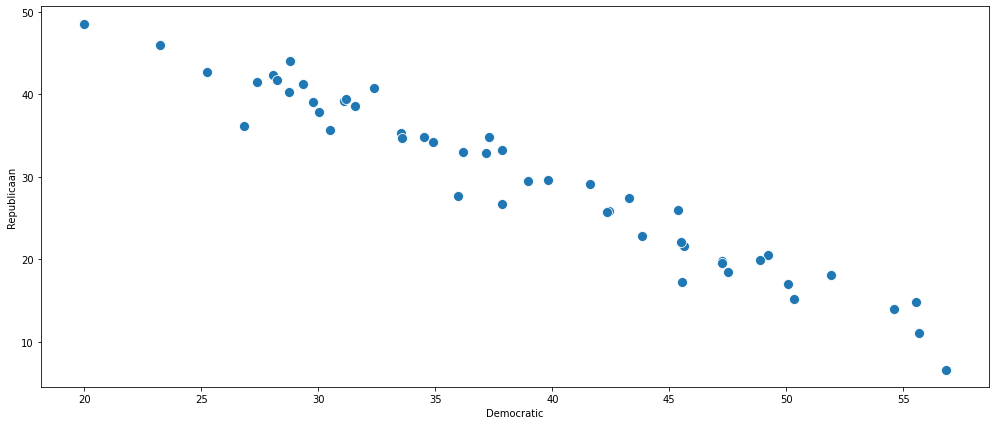

In [37]:
### Before we can run a multivariable linear regression, we need to check for linearity
sns.scatterplot(x='Democratic', y='Republican', data=df, s=100)
plt.xlabel('Democratic')
plt.ylabel('Republicaan');

After plotting Democratic and Republican voters, we note hat there is a  negative linear relationship between the two variables

In [39]:
# Since there was a linear relationship between Democratic and Republicans, we won't conduct a multivarible regression but we will instead do a regression analysis using our DominantParty column
outcome_3, predictors_3 = patsy.dmatrices("PercentCFHH ~ DominantParty", data=df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:            PercentCFHH   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.924
Date:                Fri, 12 Mar 2021   Prob (F-statistic):              0.172
Time:                        13:38:43   Log-Likelihood:                -148.99
No. Observations:                  50   AIC:                             302.0
Df Residuals:                      48   BIC:                             305.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.1233      0

There is a weak positive correlation between the dominant party and Calfresh  applications. P value is pretty high suggesting that a relationship between the two variables could be due to chance. Our R-squared is 0.039, indicating that our independent variable (DominantParty) explains only 3.9% of the data variation of our variable (PercentCalFreshHousehold).
The effect size of the relationship between CalFresh household percentage and DominantParty is 1.9467 and the standard error is plus or minus 1.403
<center>PercentCFHH = 10.1233 + 1.9467 * DominantParty in the county</center>

# EDA
- What distributions do your variables take?
	- When plotting Democratic voters to PercentageCalfreshHouseholds, we saw no significant relation between the variables. This matched the graph of Republican voters to PercentageCalfreshHouseholds where we also saw no relationship between the variables.


- Are there any outliers?
	- The data as a whole does not have an outlier. But when separated by dominant party the set with democratic counties have an outlier, which can be attributed to LA. However, that outlier is not significant enough to remove from our dataset.


- Relationship between variables:
	- In our linear regressions, our P-value is high. This signifies that political parties are unlikely to have a direct relationship with CalFresh applications. High P-values indicate that a relationship is due to chance.


- Approaches
	- We started our first analysis using a t-test on the counties, split by either Democratic or Republican to see if there was a relationship with the percentage of Calfresh households. We found a high p-value so the relationship was due to chance. Our next step was to try an ols regression test using Democratic voters in a county as the predictor variable for PercentageOfCalfreshHousehold and then did a separate ols regression test using Republican voters in a county as the predictor variable for PercentageOfCalfreshHousehold. In both of these tests, our p-values for each variable were high so we could say that the variation was based on chance instead. We then attempted to do a multivariate analysis using Democratic and Republican voters as predictors for PercentageOfCalfreshHousehold. However, since we found a linear relationship between percentage of Democratic voters and Republican voters, we could not use a multivariate regression. We instead chose to do another single variable analysis but this time we classified a county as either Democrat or Republican based on whether or not that county was Democratic or Republican leaning. In this analysis, we also had a high p-value so we could not make any significant conclusions. 
	
- Results
	- Based on our data and analysis we came to the result that there was no significant relationship between the dominant political party of a county and the percentage of calfresh applicants for that specific county. While at first glance it may appear that democratic counties have a slightly lower percentage of CalFresh applicants, the difference was not statistically significant. 

- Interpretation of Findings
	- The findings were unexpected. We originally thought that political affiliation could affect the percentage of CalFresh households since a certain party favors CalFresh significantly more than the other. In general, the percentage of CalFresh households in a county doesn’t depend on which party the county is leaning on.


# Ethics & Privacy

Since the information we will use for our project is publicly available on government websites, we believe we have permission to use and analyze the information. Individual information is not provided in these data so individual privacy is protected. To our knowledge, the data is collected ethically.

An unintended consequence from our project could be that some people may view our data and decide to not apply for CalFresh because they may think that their political affiliation will hurt their chances of receiving aid if their political affiliation is revealed. Another unintended consequence could be that political candidates may be negatively affected because voters could change their vote based on the result from our study regardless of how conclusive the results are.


# Conclusion & Discussion

- Limitation
    - Our data is limited to 50 out of 58 counties in California. This is because the statistic atlas for the percentage of households receive food stamp in California by counties in 2018 excludes the 8 least populated counties.
    - We also acknowledge that not every person in a county votes so that generalizing the political views of a county based on registered voters may not always reflect the political leanings of that county. Another limitation is that we do not know the political affiliation of those who did receive CalFresh applications. For example, we do not know whether person A who received CalFresh is a registered Democrat or Republican.

- Discussion & Description
	- In this project, we analyzed whether political affiliation can affect the percentage of CalFresh households. We received our data from government websites for the political preference of each voter and for the percentage of CalFresh households in 50 counties.


In conclusion, political affiliation does not affect the percentage of CalFresh recipients in a county. From our linear regression model and t-test, we can see that the relationship between the parties and the percentage of CalFresh households are due to chance. This means that a certain political party may not have a significant impact on the number of CalFresh households.
Our conclusion goes against our initial hypothesis that Democratic counties would have a higher percentage of Calfresh households since Democratic voters tend to support progressive policies for the general welfare of the public. 


# Team Contributions

Maxwell: Prepared dataset for political affiliation of voters in county, t-test analysis, finalwriteup + video script

Alyssa: Merged datasets, stacked barplot, distplots, linear regression, finalwriteup + video script

Anh: Standardized dataset, linear regression, finalwriteup + video script

Efrain: Prepared dataset for percentage of Calfresh households, histogram and boxplots, finalwriteup + video script